In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Titanic.csv'
data = pd.read_csv(file_path)

In [9]:
sns.set(style="whitegrid")

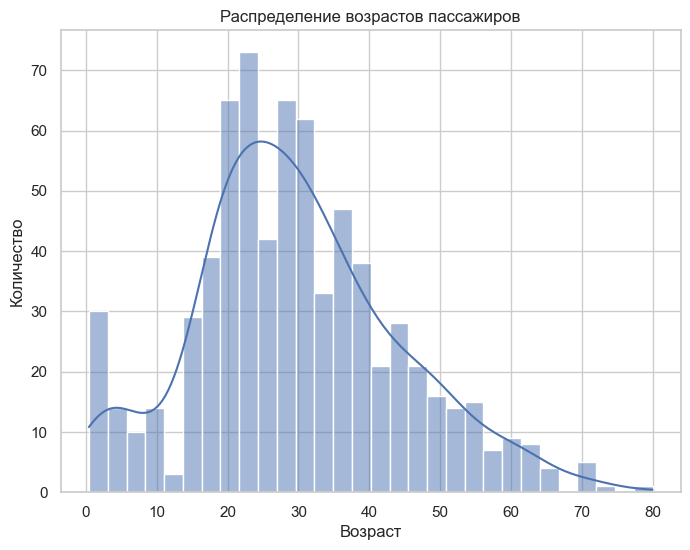

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'].dropna(), bins=30, kde=True)
plt.title('Распределение возрастов пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

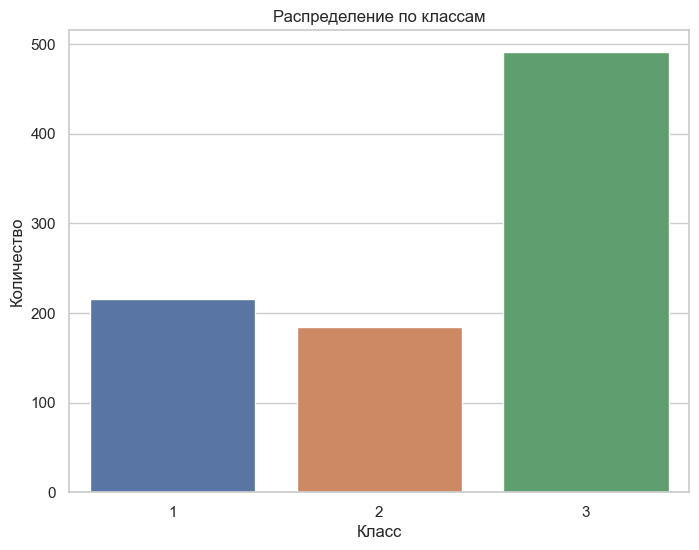

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=data)
plt.title('Распределение по классам')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

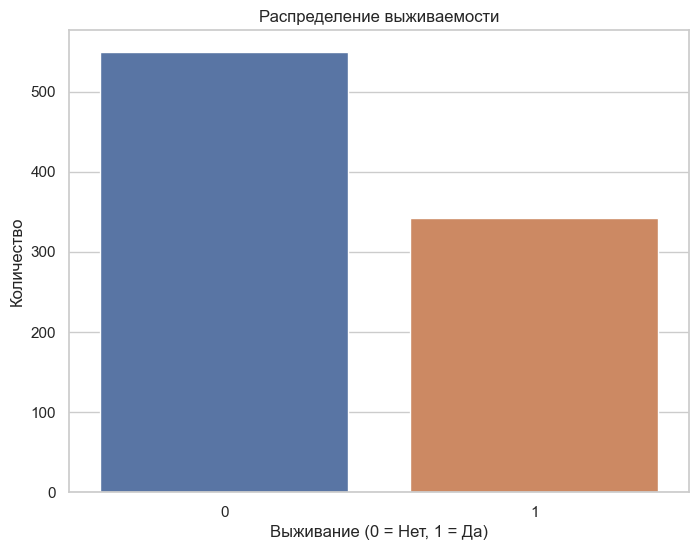

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=data)
plt.title('Распределение выживаемости')
plt.xlabel('Выживание (0 = Нет, 1 = Да)')
plt.ylabel('Количество')
plt.show()

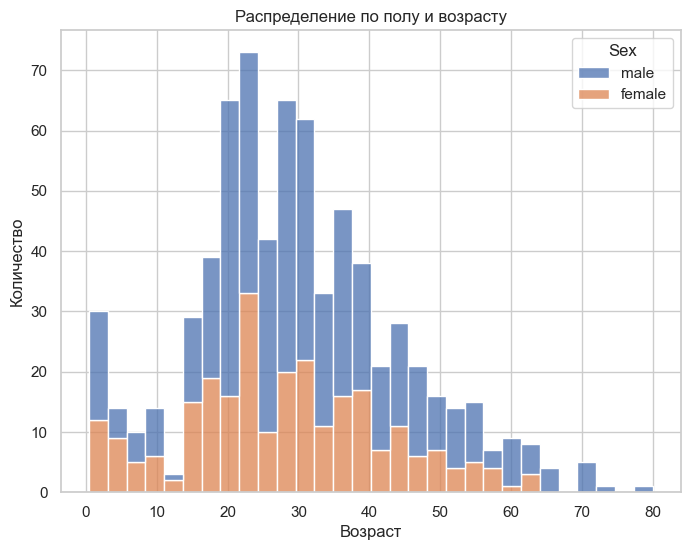

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', hue='Sex', multiple='stack', bins=30)
plt.title('Распределение по полу и возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

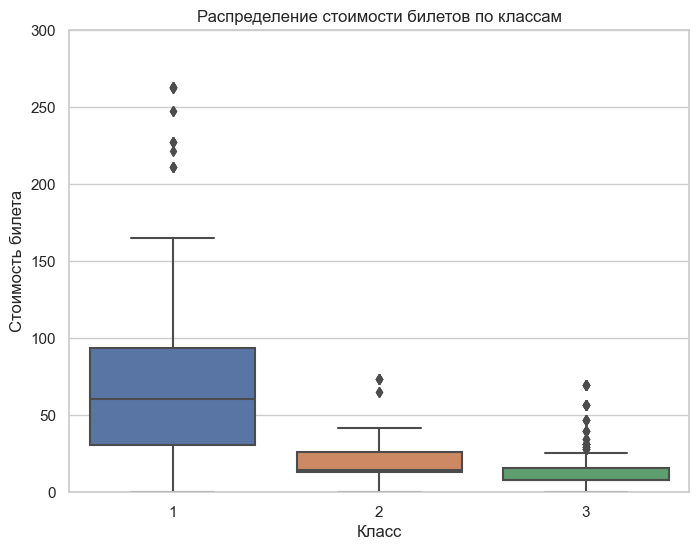

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Распределение стоимости билетов по классам')
plt.xlabel('Класс')
plt.ylabel('Стоимость билета')
plt.ylim(0, 300)  # Ограничим ось для наглядности
plt.show()

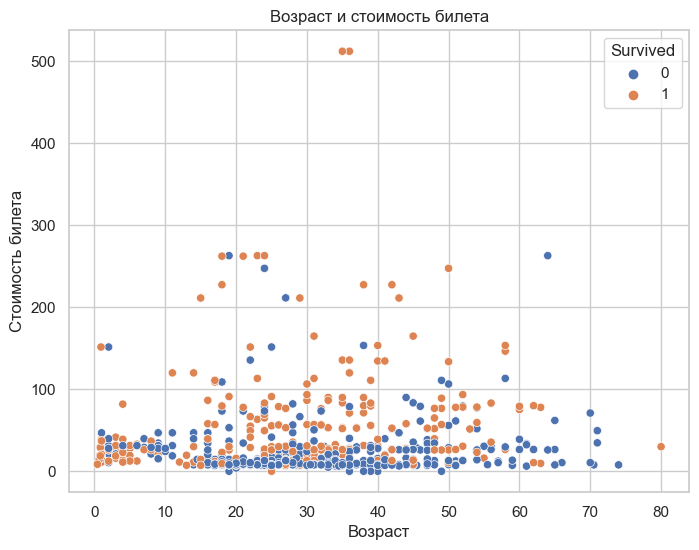

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data)
plt.title('Возраст и стоимость билета')
plt.xlabel('Возраст')
plt.ylabel('Стоимость билета')
plt.show()

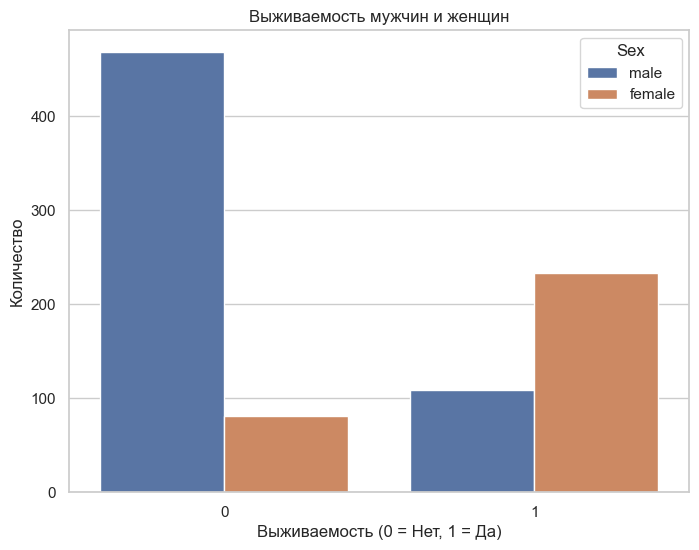

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Выживаемость мужчин и женщин')
plt.xlabel('Выживаемость (0 = Нет, 1 = Да)')
plt.ylabel('Количество')
plt.show()

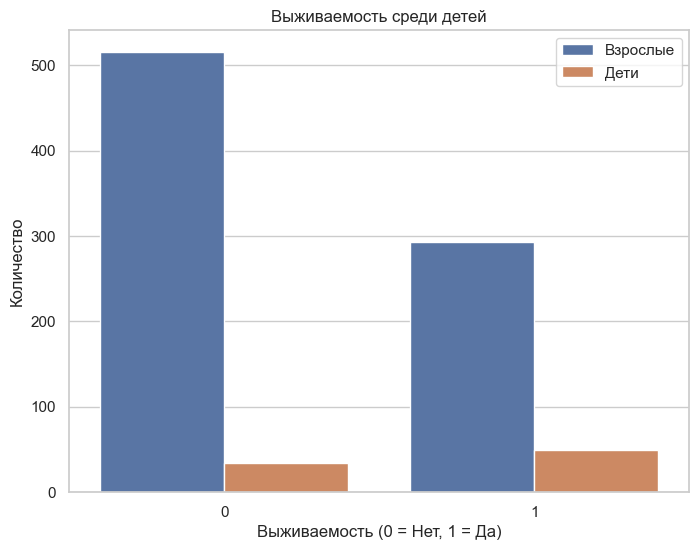

In [17]:
data['IsChild'] = data['Age'] < 16
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='IsChild', data=data)
plt.title('Выживаемость среди детей')
plt.xlabel('Выживаемость (0 = Нет, 1 = Да)')
plt.ylabel('Количество')
plt.legend(['Взрослые', 'Дети'])
plt.show()

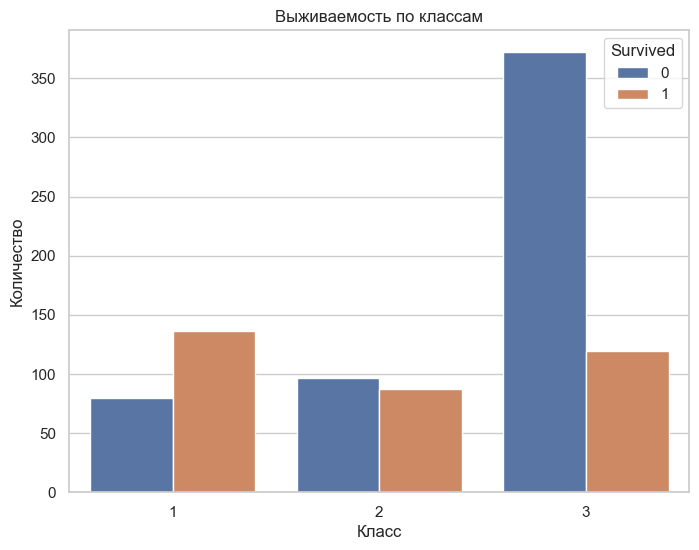

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Выживаемость по классам')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

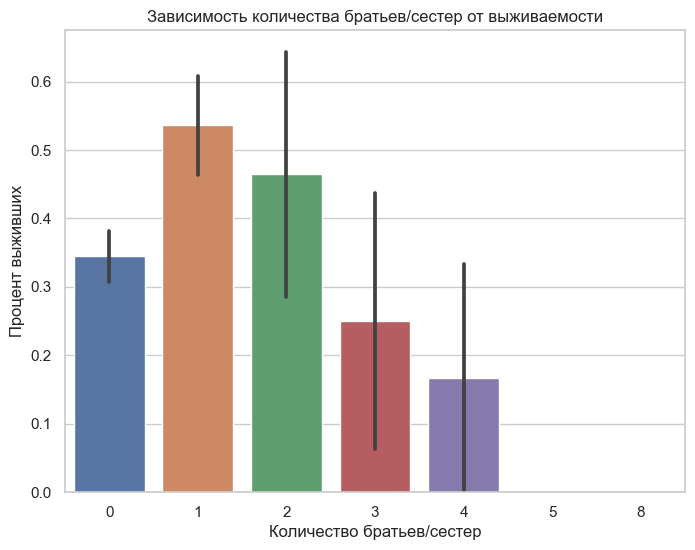

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(x='SibSp', y='Survived', data=data)
plt.title('Зависимость количества братьев/сестер от выживаемости')
plt.xlabel('Количество братьев/сестер')
plt.ylabel('Процент выживших')
plt.show()

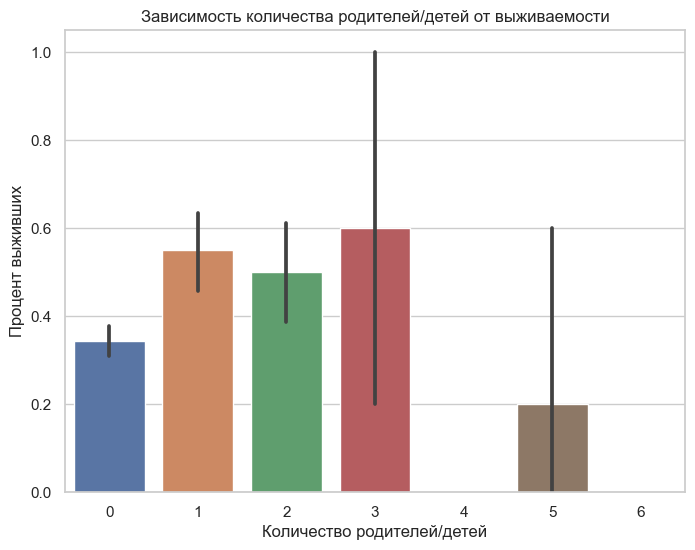

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Parch', y='Survived', data=data)
plt.title('Зависимость количества родителей/детей от выживаемости')
plt.xlabel('Количество родителей/детей')
plt.ylabel('Процент выживших')
plt.show()

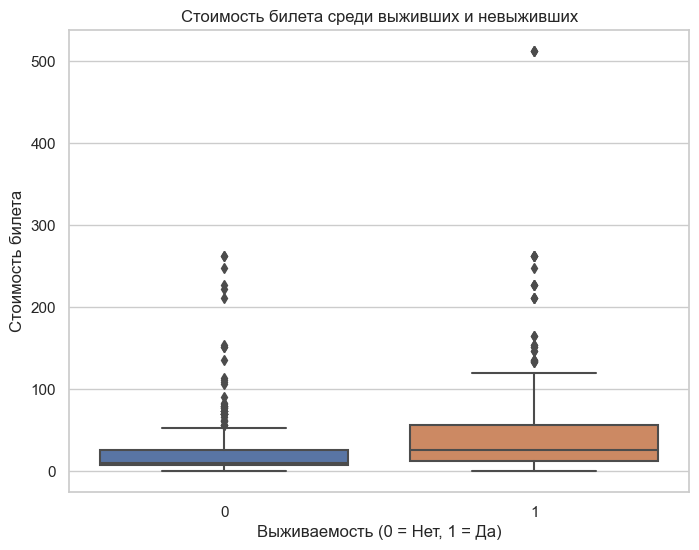

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Стоимость билета среди выживших и невыживших')
plt.xlabel('Выживаемость (0 = Нет, 1 = Да)')
plt.ylabel('Стоимость билета')
plt.show()

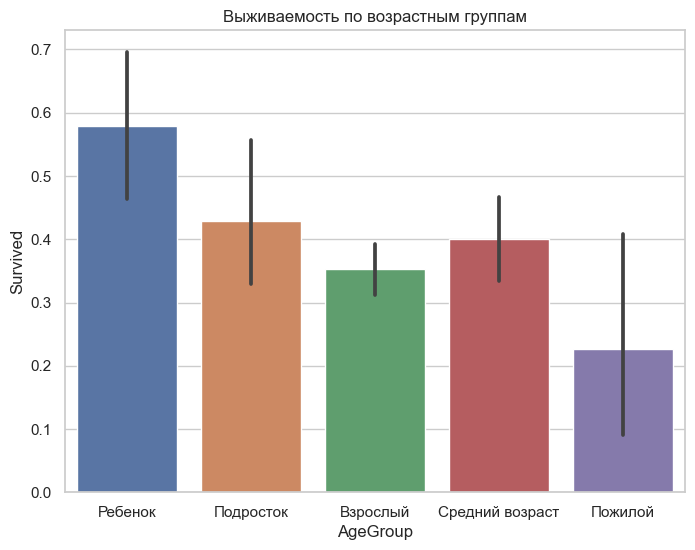

In [42]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Ребенок', 'Подросток', 'Взрослый', 'Средний возраст', 'Пожилой'])
plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='Survived', data=data)
plt.title('Выживаемость по возрастным группам')
plt.show()

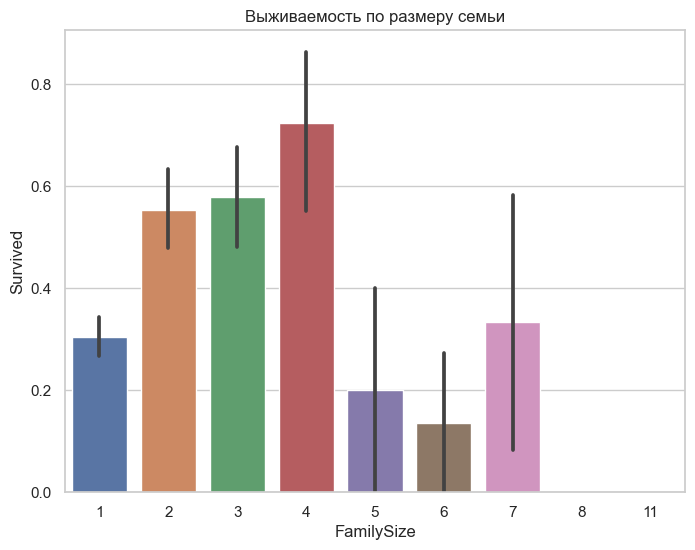

In [44]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
plt.figure(figsize=(8, 6))
sns.barplot(x='FamilySize', y='Survived', data=data)
plt.title('Выживаемость по размеру семьи')
plt.show()

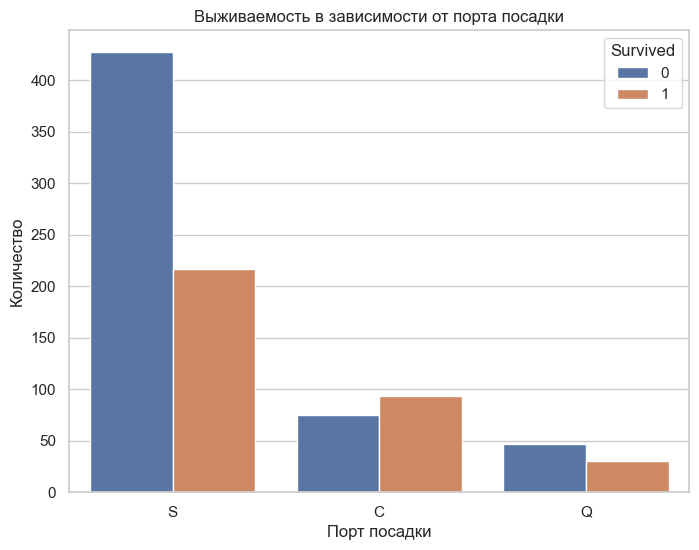

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Выживаемость в зависимости от порта посадки')
plt.xlabel('Порт посадки')
plt.ylabel('Количество')
plt.show()

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data['Age'] = imputer.fit_transform(data[['Age']])
data['Fare'] = imputer.fit_transform(data[['Fare']])

# Замена пропущенных значений в категориальных столбцах модой
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [32]:
catregorical_cols= data.select_dtypes(include=['object']).columns
label_encoders ={}

In [43]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

data['Sex'] = label.fit_transform(data['Sex'])
data['Embarked'] = label.fit_transform(data['Embarked'])
data['Parch'] = label.fit_transform(data['Parch'])
data['AgeGroup'] = label.fit_transform(data['AgeGroup'])

In [45]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'AgeGroup']
X = data[features]
y = data['Survived']

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.regularizers import l2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.008), input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


Epoch 1/10


18/18 [==============================] - 1s 13ms/step - loss: 0.9914 - accuracy: 0.6661 - val_loss: 0.9215 - val_accuracy: 0.7133
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 0.8972 - accuracy: 0.7610 - val_loss: 0.8316 - val_accuracy: 0.7762
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 0.8216 - accuracy: 0.7891 - val_loss: 0.7540 - val_accuracy: 0.7832
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7613 - accuracy: 0.7961 - val_loss: 0.7004 - val_accuracy: 0.8182
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7146 - accuracy: 0.8049 - val_loss: 0.6641 - val_accuracy: 0.8252
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.8049 - val_loss: 0.6351 - val_accuracy: 0.8252
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6534 - accuracy: 0.8084 - val_loss: 0.6107 - val_accuracy: 0.8182
Epoch 8/10
18/18

Epoch 1/20
18/18 [==============================] - 1s 11ms/step - loss: 1.0082 - accuracy: 0.5501 - val_loss: 0.9543 - val_accuracy: 0.8042
Epoch 2/20
18/18 [==============================] - 0s 3ms/step - loss: 0.9146 - accuracy: 0.7944 - val_loss: 0.8649 - val_accuracy: 0.8392
Epoch 3/20
18/18 [==============================] - 0s 3ms/step - loss: 0.8278 - accuracy: 0.8032 - val_loss: 0.7691 - val_accuracy: 0.8322
Epoch 4/20
18/18 [==============================] - 0s 3ms/step - loss: 0.7455 - accuracy: 0.7996 - val_loss: 0.6870 - val_accuracy: 0.8322
Epoch 5/20
18/18 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.8084 - val_loss: 0.6425 - val_accuracy: 0.8322
Epoch 6/20
18/18 [==============================] - 0s 3ms/step - loss: 0.6569 - accuracy: 0.8102 - val_loss: 0.6132 - val_accuracy: 0.8392
Epoch 7/20
18/18 [==============================] - 0s 3ms/step - loss: 0.6351 - accuracy: 0.8084 - val_loss: 0.5953 - val_accuracy: 0.8322
Epoch 8/20
18/18 [=

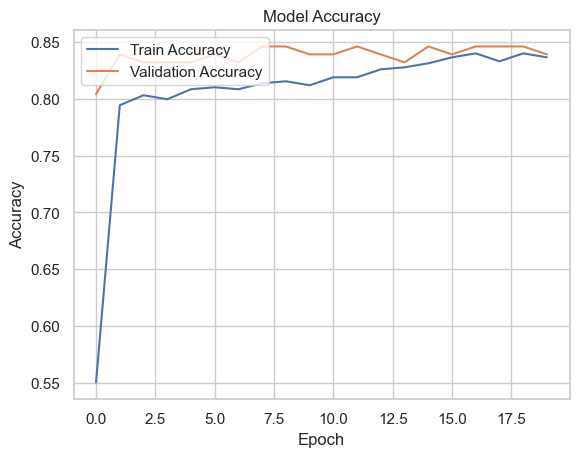

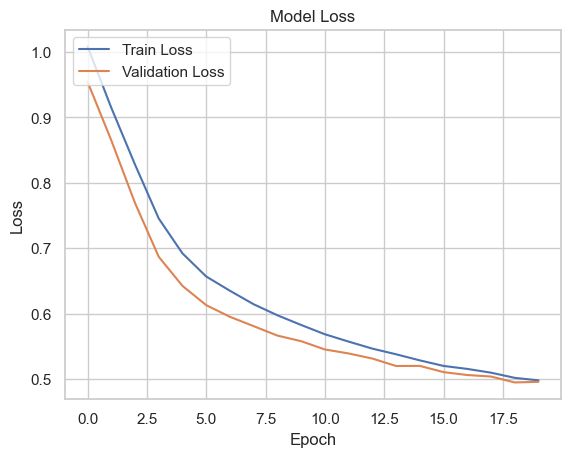

In [53]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.008), input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()


In [54]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix

kf = KFold(n_splits=3, shuffle=True, random_state=43)

fold_metrics = []
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]
    X_test = scaler.transform(X_test)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print(f"Fold {fold}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    fold_metrics.append((classification_report(y_test, y_pred, output_dict=True), confusion_matrix(y_test, y_pred)))

10/10 [==============================] - 0s 889us/step
Fold 1
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       184
           1       0.80      0.64      0.71       113

    accuracy                           0.80       297
   macro avg       0.80      0.77      0.78       297
weighted avg       0.80      0.80      0.80       297

Confusion Matrix:
 [[166  18]
 [ 41  72]]
10/10 [==============================] - 0s 889us/step
Fold 2
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.89       184
           1       0.84      0.76      0.80       113

    accuracy                           0.86       297
   macro avg       0.85      0.84      0.84       297
weighted avg       0.85      0.86      0.85       297

Confusion Matrix:
 [[168  16]
 [ 27  86]]
10/10 [==============================] - 0s 778us/step
Fold 3
Classification Report:
     

In [ ]:
Fold 1:

True Positives (TP): Предсказание человек выживет, и он действительно выжил – 72. True Negatives (TN): Предсказание, что человек погибнет, и он действительно погиб – 166. False Positives (FP): Предсказание, что человек выживет, а по факту погиб – 41. False Negatives (FN): Предсказание, что человек погибнет, а по факту выжил – 18.

Fold 2:

TP: 86 TN: 168 FP: 27 FN: 16

Fold 3:

TP: 84 TN: 167 FP: 32 FN: 14

Вывод: модель способна показывать стабильно правильные фолды. Средняя точность модели около 80–85% в зависимости от фолда.